# **Submission Pertama: Menyelesaikan Permasalahan Human Resources**

*   Name: Rasyid Alfiansyah
*   Email: rasyidalfiansyh@gmail.com
*   Dicoding ID: rasyidalfiansyh







# Persiapan

## Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import files

## Menyiapkan data yang akan diguankan

In [2]:
url = (
    'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/' \
    'main/employee/employee_data.csv'
)
df = pd.read_csv(url)
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


# Data Understanding

In [3]:
print(df.info())
print(df.describe())
print(df.select_dtypes(include='object').nunique())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

# Data Preparation / Preprocessing

In [4]:
# Drop columns with single unique values
df.drop(['Over18', 'EmployeeCount', 'StandardHours'], axis=1, inplace=True)

df.dropna(inplace=True)
print("After dropna, shape:", df.shape)
df.drop_duplicates(inplace=True)

# Convert Attrition to integer
df['Attrition'] = df['Attrition'].astype(int)

After dropna, shape: (1058, 32)


# Map Ordinal Features to Labels

In [5]:
def map_ordinal(df, cols, mapping):
    for col in cols:
        df[col] = df[col].map(mapping)

# Define mappings
type_map = {0: 'No', 1: 'Yes'}
edu_map = {1:'Below College',2:'College',3:'Bachelor',4:'Master',5:'Doctor'}
basic_map = {1:'Low',2:'Medium',3:'High',4:'Very High'}
perf_map = {1:'Low',2:'Good',3:'Excellent',4:'Outstanding'}

# Apply
df['Attrition'] = df['Attrition'].map(type_map)
map_ordinal(df, ['Education'], edu_map)
map_ordinal(df, ['EnvironmentSatisfaction','JobInvolvement',
                  'JobSatisfaction','RelationshipSatisfaction'], basic_map)
map_ordinal(df, ['WorkLifeBalance','PerformanceRating'], perf_map)

# Save cleaned data for dashboard
clean_file = 'employee_data_cleaned.csv'
df.to_csv(clean_file, index=False)

# Exploratory Data Analysis

## Correlation Heatmap

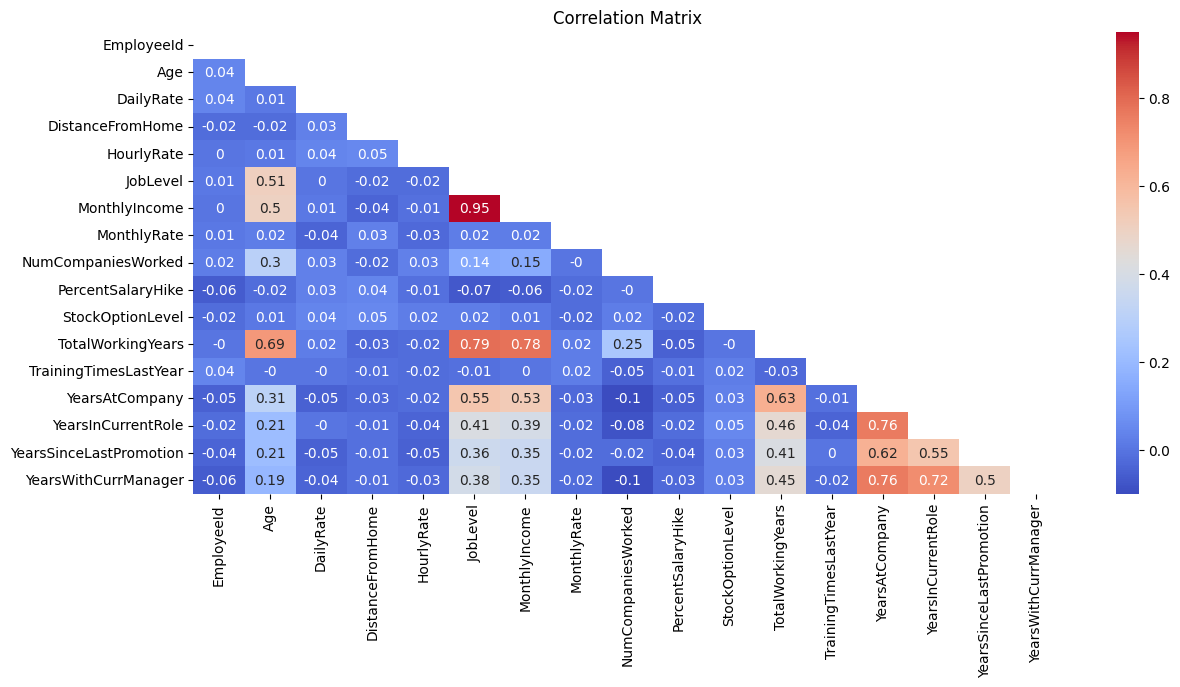

In [6]:
plt.figure(figsize=(14,6))
num_corr = df.select_dtypes(include=[np.number]).corr().round(2)
mask = np.triu(np.ones_like(num_corr, dtype=bool))
sns.heatmap(num_corr, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')
plt.show()

## Distribution of Numerical Features

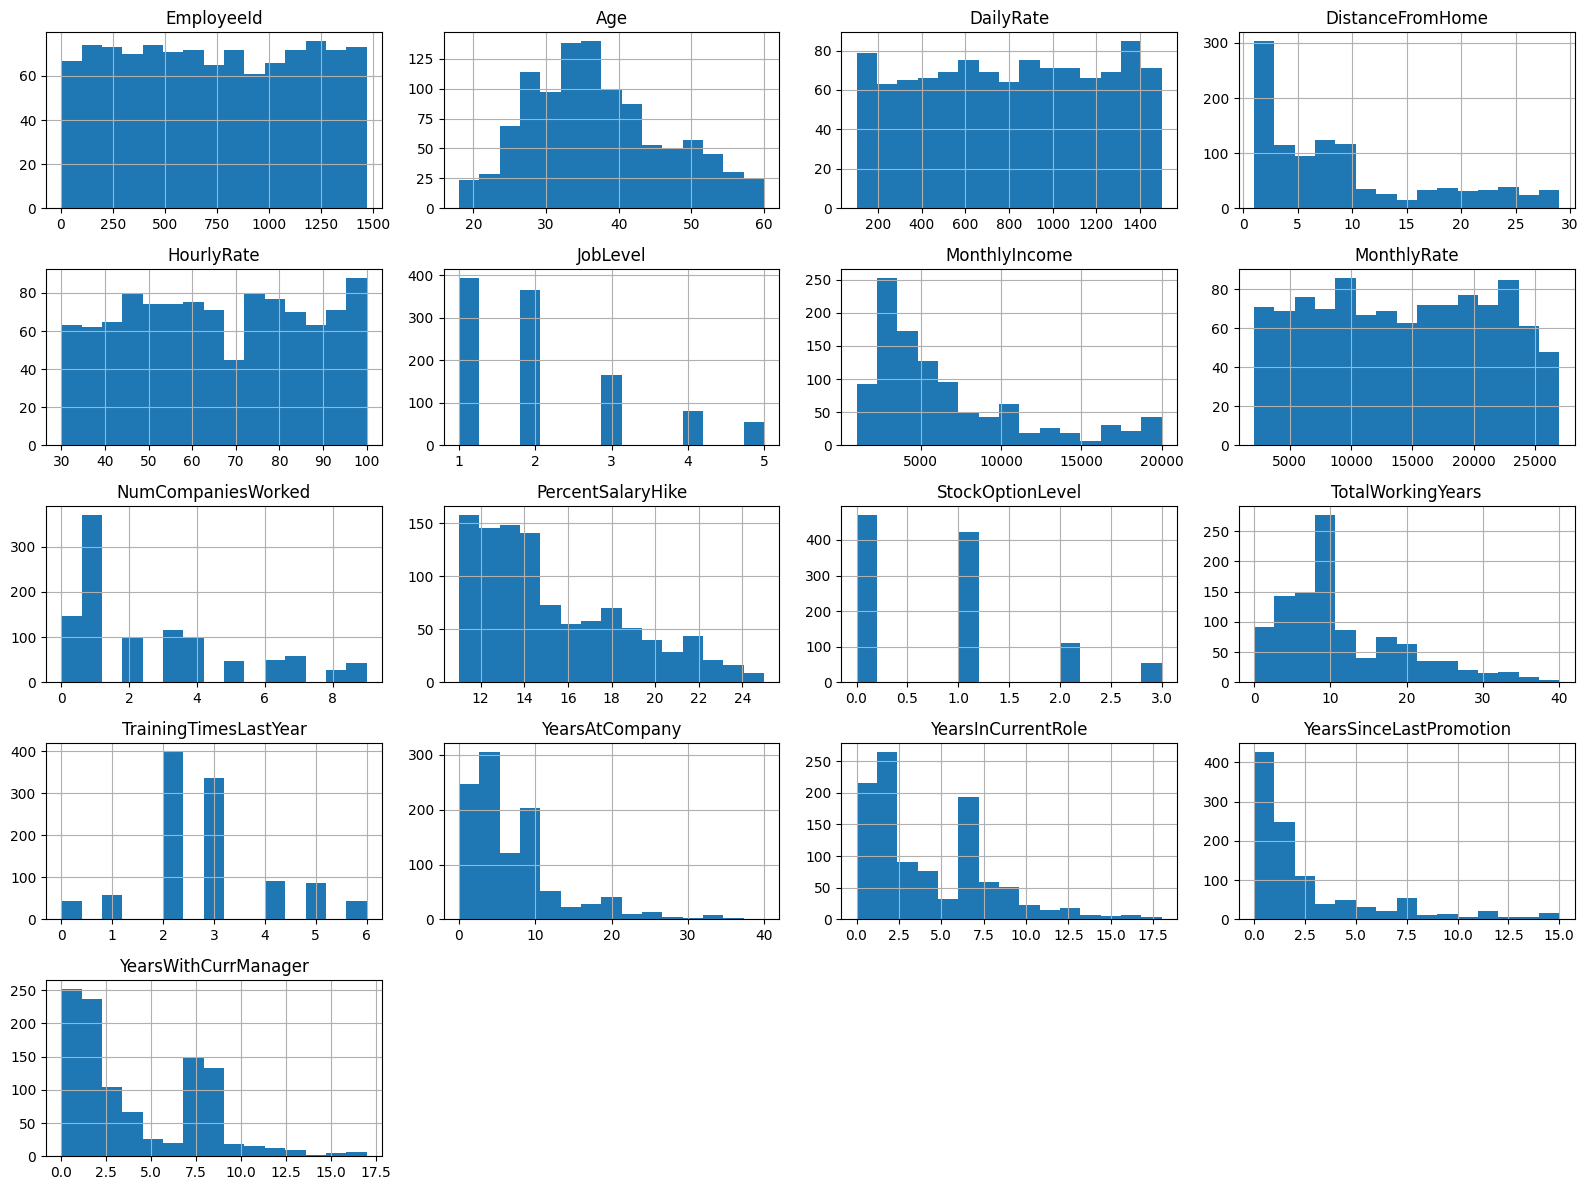

In [7]:
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].hist(bins=15, figsize=(16,12))
plt.tight_layout()
plt.show()

## Categorical Feature Counts

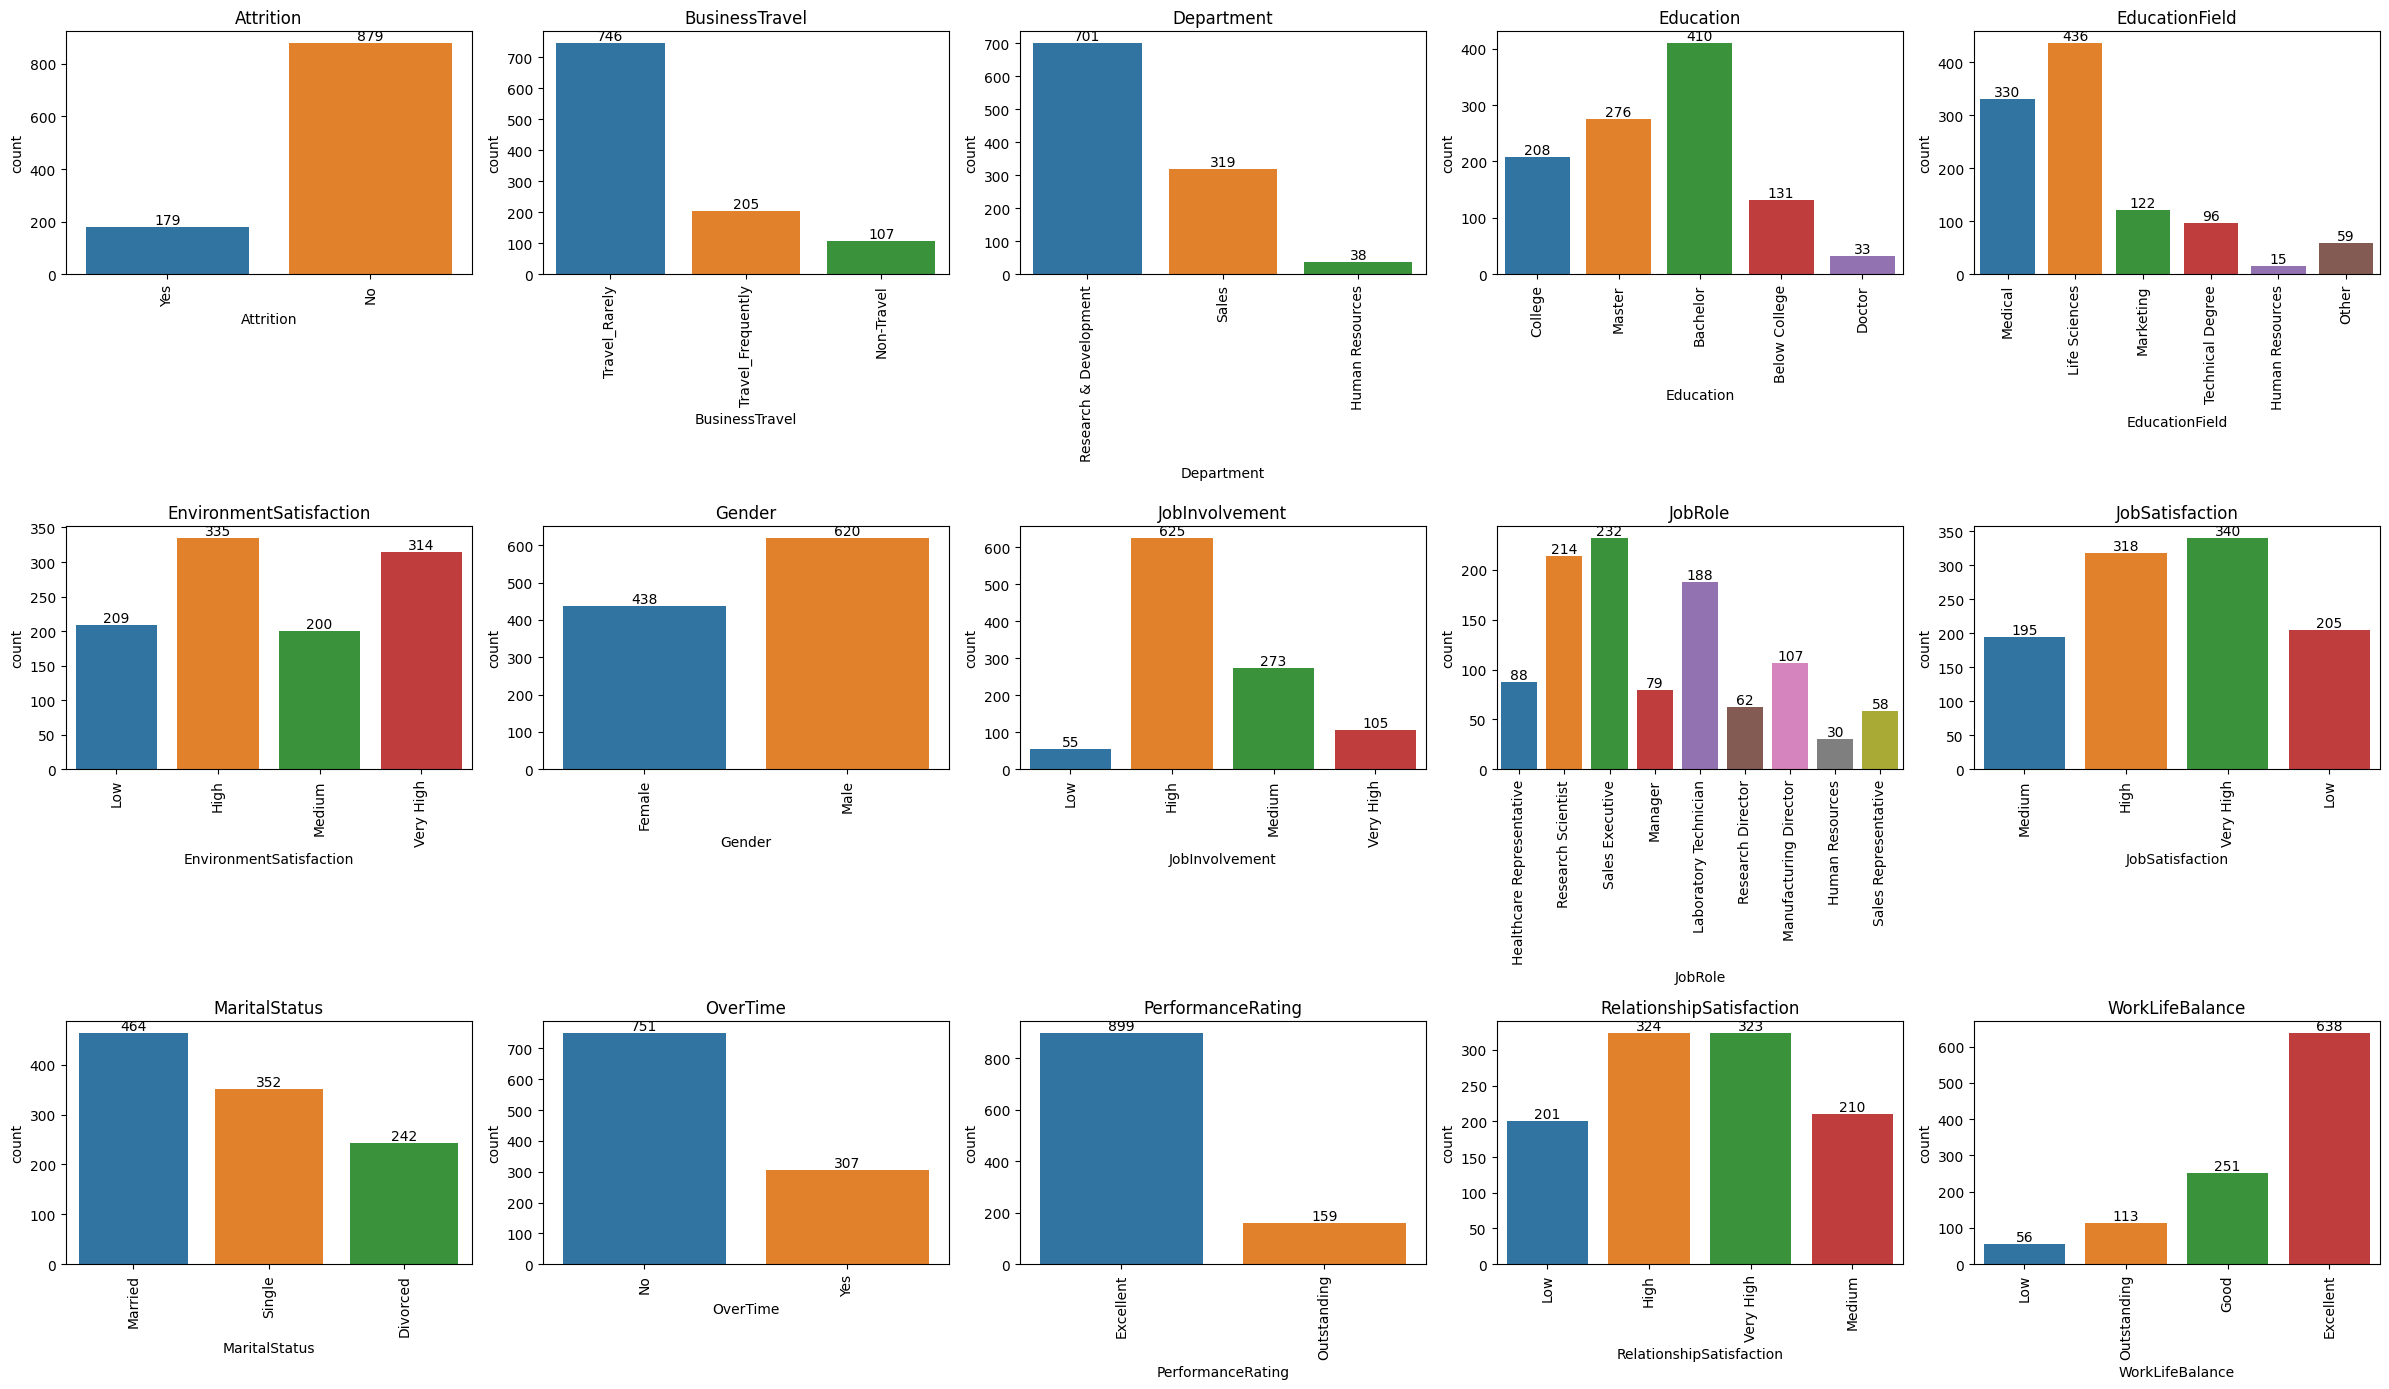

In [8]:
tcat = df.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(3, 5, figsize=(24,14))
for i, col in enumerate(tcat):
    ax = axes[i//5, i%5]
    sns.countplot(data=df, x=col, hue=col, ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=90)
    for p in ax.patches:
        ax.annotate(int(p.get_height()),
                    (p.get_x()+p.get_width()/2, p.get_height()),
                    ha='center', va='bottom')
plt.tight_layout()
plt.show()

## Attrition Balance

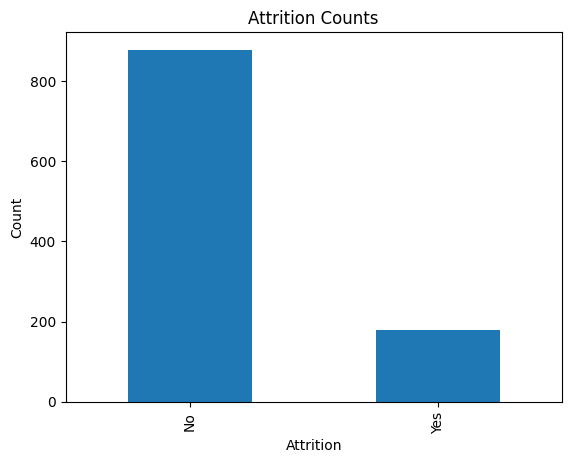

In [9]:
df['Attrition'].value_counts().plot.bar()
plt.title('Attrition Counts')
plt.ylabel('Count')
plt.show()

# Data Transformation for Modeling

## Remove Identifier

In [10]:
mod_df = df.drop('EmployeeId', axis=1)

## Encode Categorical Vars

In [11]:
le = LabelEncoder()
for col in mod_df.select_dtypes(include='object').columns:
    mod_df[col] = le.fit_transform(mod_df[col])

## Scale Numerics

In [12]:
scaler = MinMaxScaler()
for col in num_cols:
    if col in mod_df.columns:
        mod_df[col] = scaler.fit_transform(mod_df[[col]])

## Train/Test Split

In [13]:
X = mod_df.drop('Attrition', axis=1)
y = mod_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print('Shapes:', X_train.shape, X_test.shape)

Shapes: (846, 30) (212, 30)


# Modeling

In [14]:
models = {
    'Logistic': LogisticRegression(class_weight='balanced', max_iter=10000),
    'SVM': SVC(class_weight='balanced', max_iter=10000),
    'DecisionTree': DecisionTreeClassifier(class_weight='balanced'),
    'RandomForest': RandomForestClassifier(class_weight='balanced'),
    'GradientBoosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'NaiveBayes': GaussianNB()
}

metrics = {}
for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    preds = mdl.predict(X_test)
    metrics[name] = {
        'Acc': accuracy_score(y_test, preds),
        'Prec': precision_score(y_test, preds),
        'Rec': recall_score(y_test, preds),
        'F1': f1_score(y_test, preds)
    }

metrics_df = pd.DataFrame(metrics).T.round(3)
print(metrics_df)

                    Acc   Prec    Rec     F1
Logistic          0.708  0.329  0.694  0.446
SVM               0.764  0.400  0.778  0.528
DecisionTree      0.712  0.234  0.306  0.265
RandomForest      0.830  0.500  0.056  0.100
GradientBoosting  0.844  0.600  0.250  0.353
KNN               0.816  0.400  0.167  0.235
NaiveBayes        0.769  0.382  0.583  0.462


In [15]:
# Select best model (GradientBoosting)
best = GradientBoostingClassifier().fit(X_train, y_train)

# Evaluation

=== Training ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       703
           1       1.00      0.82      0.90       143

    accuracy                           0.97       846
   macro avg       0.98      0.91      0.94       846
weighted avg       0.97      0.97      0.97       846



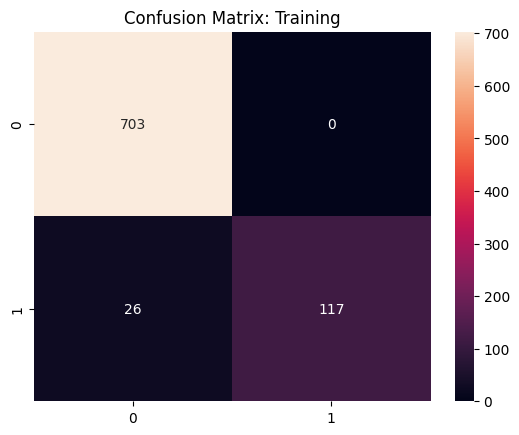

=== Testing ===
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       176
           1       0.60      0.25      0.35        36

    accuracy                           0.84       212
   macro avg       0.73      0.61      0.63       212
weighted avg       0.82      0.84      0.82       212



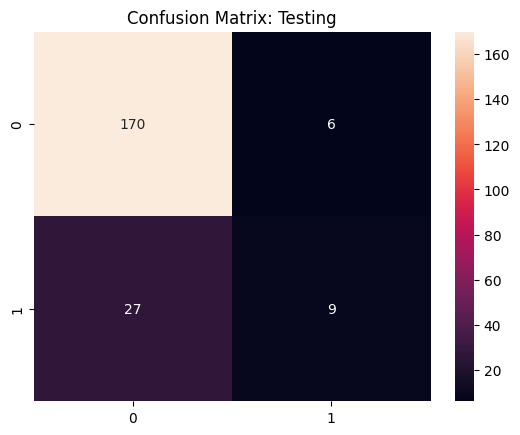

In [16]:
def eval_report(y_true, y_pred, label):
    print(f"=== {label} ===")
    print(classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d')
    plt.title(f"Confusion Matrix: {label}")
    plt.show()

train_pred = best.predict(X_train)
test_pred = best.predict(X_test)
eval_report(y_train, train_pred, 'Training')
eval_report(y_test, test_pred, 'Testing')

# 9. Save Model

In [17]:
joblib.dump(best, 'best_model_gb.joblib')

['best_model_gb.joblib']